In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cip = pd.read_csv("../data/Commerical_Insurance_Premiums.csv")
cip.head()

,Year,Single Coverage,Family Coverage
0,1999,"$2,196","$5,791"
1,2000,"$2,471*","$6,438*"
2,2001,"$2,689*","$7,061*"
3,2002,"$3,083*","$8,003*"
4,2003,"$3,383*","$9,068*"


In [3]:
cip.dtypes

Year                int64
Single Coverage    object
Family Coverage    object
dtype: object

#### Cleaning the data brought in

In [4]:
cip['Single Coverage'] = cip['Single Coverage'].str.rstrip("*")
cip['Family Coverage'] = cip['Family Coverage'].str.rstrip("*")
cip

,Year,Single Coverage,Family Coverage
0,1999,"$2,196","$5,791"
1,2000,"$2,471","$6,438"
2,2001,"$2,689","$7,061"
3,2002,"$3,083","$8,003"
4,2003,"$3,383","$9,068"
5,2004,"$3,695","$9,950"
6,2005,"$4,024","$10,880"
7,2006,"$4,242","$11,480"
8,2007,"$4,479","$12,106"
9,2008,"$4,704","$12,680"


In [5]:
cip['Single Coverage'] = cip['Single Coverage'].str.lstrip("$")
cip['Family Coverage'] = cip['Family Coverage'].str.lstrip("$")
cip

,Year,Single Coverage,Family Coverage
0,1999,"2,196","5,791"
1,2000,"2,471","6,438"
2,2001,"2,689","7,061"
3,2002,"3,083","8,003"
4,2003,"3,383","9,068"
5,2004,"3,695","9,950"
6,2005,"4,024","10,880"
7,2006,"4,242","11,480"
8,2007,"4,479","12,106"
9,2008,"4,704","12,680"


In [6]:
cip['Single Coverage'] = cip['Single Coverage'].replace(',','', regex=True).astype('int')
cip['Family Coverage'] = cip['Family Coverage'].replace(',','', regex=True).astype('int')
cip

,Year,Single Coverage,Family Coverage
0,1999,2196,5791
1,2000,2471,6438
2,2001,2689,7061
3,2002,3083,8003
4,2003,3383,9068
5,2004,3695,9950
6,2005,4024,10880
7,2006,4242,11480
8,2007,4479,12106
9,2008,4704,12680


#### building barcharts to compare data

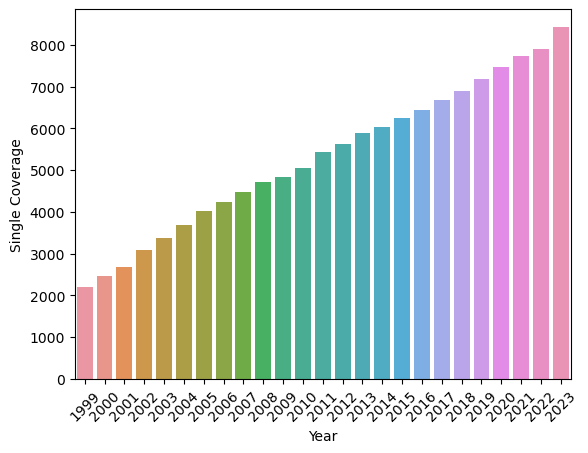

In [7]:
sns.barplot(data=cip, x='Year', y='Single Coverage')
plt.xticks(rotation=45);

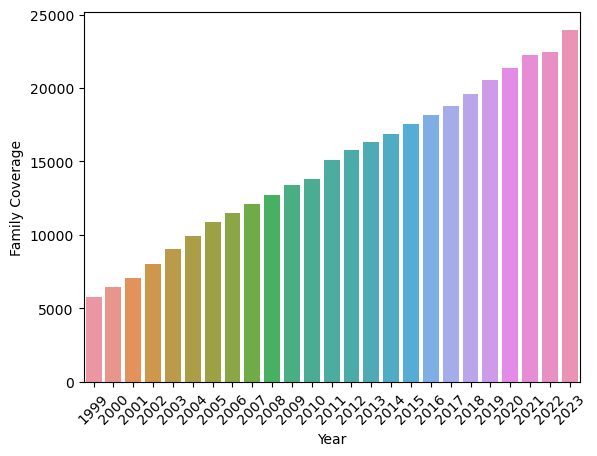

In [8]:
sns.barplot(data=cip, x='Year', y='Family Coverage')
plt.xticks(rotation=45);

In [9]:
cip1=cip.reset_index().set_index('Year')
cip1 = cip1.drop('index', axis = 1)
cip1

,Single Coverage,Family Coverage
Year,,
1999,2196,5791
2000,2471,6438
2001,2689,7061
2002,3083,8003
2003,3383,9068
2004,3695,9950
2005,4024,10880
2006,4242,11480
2007,4479,12106


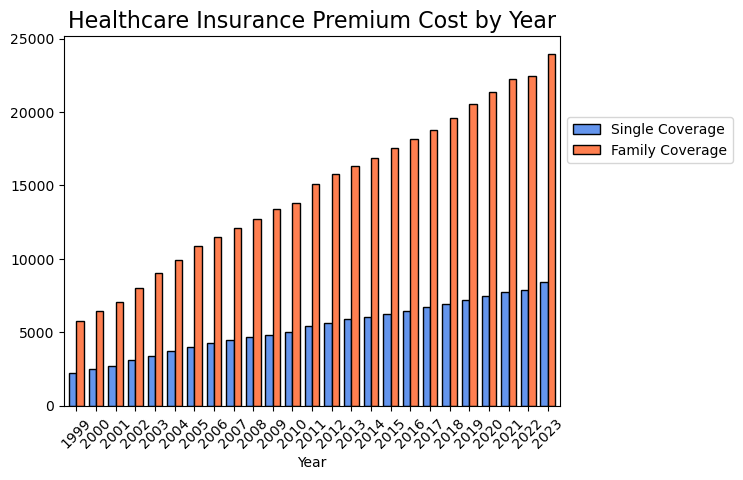

In [10]:
cip1.plot(kind = 'bar',
         color = ['cornflowerblue', 'coral'],
         edgecolor = 'black', width = 0.75)
plt.xticks(rotation = 45)
plt.title('Healthcare Insurance Premium Cost by Year', fontsize = 16)  
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');

#### bringing in the average life expectancy data to merge

In [11]:
le = pd.read_csv("../data/US_life_expectancy_macro.csv")
le.head()

,date,avg_life_expectancy,yoy_%_change,year
0,12/31/1950,68.14,NaN,1950
1,12/31/1951,68.33,0.28,1951
2,12/31/1952,68.52,0.28,1952
3,12/31/1953,68.71,0.28,1953
4,12/31/1954,68.90,0.28,1954


In [12]:
le = (
    le
        [['year', 'avg_life_expectancy', 'yoy_%_change']]
)
le

,year,avg_life_expectancy,yoy_%_change
0,1950,68.140,NaN
1,1951,68.330,0.28
2,1952,68.520,0.28
3,1953,68.710,0.28
4,1954,68.900,0.28
...,...,...,...
146,2096,88.376,0.12
147,2097,88.478,0.12
148,2098,88.580,0.12
149,2099,88.682,0.12


In [13]:
le= le[le['year']>1998]

In [14]:
le= le[le['year']<2024]

In [15]:
le.head(25)

,year,avg_life_expectancy,yoy_%_change
49,1999,76.612,0.19
50,2000,76.754,0.19
51,2001,76.896,0.19
52,2002,77.038,0.18
53,2003,77.180,0.18
54,2004,77.382,0.26
55,2005,77.584,0.26
56,2006,77.786,0.26
57,2007,77.988,0.26
58,2008,78.190,0.26


### building a line plot to see avg life expectancy

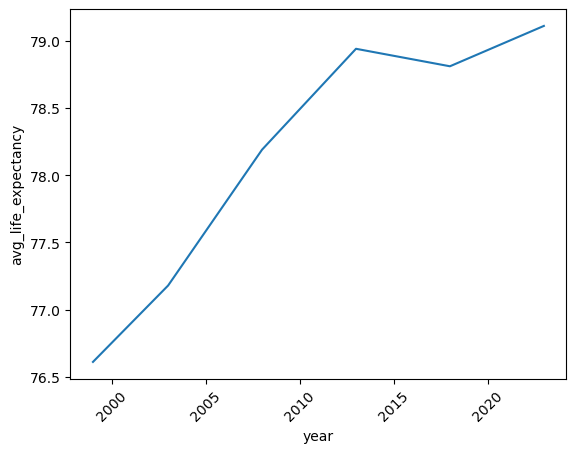

In [16]:
sns.lineplot(data=le, x='year', y='avg_life_expectancy', markers='o')
plt.xticks(rotation=45);

In [17]:
inscost = pd.merge(cip, le, left_on ='Year', right_on ='year', how = 'inner')
inscost

,Year,Single Coverage,Family Coverage,year,avg_life_expectancy,yoy_%_change
0,1999,2196,5791,1999,76.612,0.19
1,2000,2471,6438,2000,76.754,0.19
2,2001,2689,7061,2001,76.896,0.19
3,2002,3083,8003,2002,77.038,0.18
4,2003,3383,9068,2003,77.180,0.18
5,2004,3695,9950,2004,77.382,0.26
6,2005,4024,10880,2005,77.584,0.26
7,2006,4242,11480,2006,77.786,0.26
8,2007,4479,12106,2007,77.988,0.26
9,2008,4704,12680,2008,78.190,0.26


In [18]:
cip.columns

Index(['Year', 'Single Coverage', 'Family Coverage'], dtype='object')

''

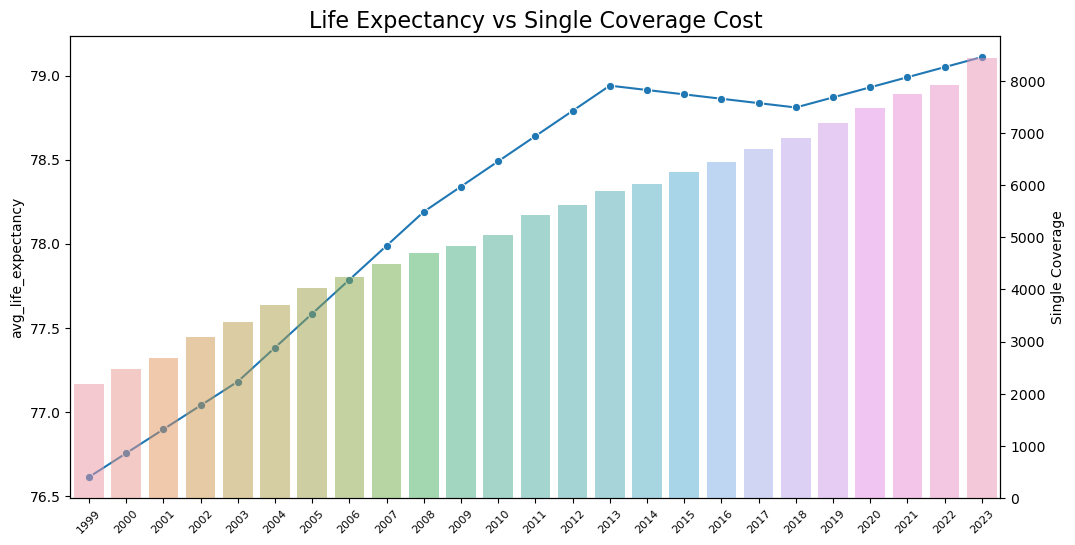

In [19]:
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(12,6))
###ax.set_xticks(ax.get_xticks()[::5])
plt.xticks(rotation=45, fontsize = 8)
sns.lineplot(data = inscost['avg_life_expectancy'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = inscost, x='Year', y='Single Coverage', alpha=0.5, ax=ax2)
plt.title('Life Expectancy vs Single Coverage Cost', fontsize = 16) 
;

### bring in unemployment numbers to compare

In [20]:
une = pd.read_csv("../data/US_unemployment_rate.csv")
une = une.drop(columns = ['date'])
une= une[une['year']>1998]
une=une.reset_index(drop=True)
une.head()

,Unemployment Rate (%),Annual Change,year
0,4.22,-0.29,1999
1,3.99,-0.23,2000
2,4.73,0.74,2001
3,5.78,1.05,2002
4,5.99,0.21,2003


In [21]:
insdf = pd.merge(inscost, une, left_on ='Year', right_on ='year', how = 'inner')
insdf = insdf.drop(columns=['year_x', 'year_y'])
insdf

,Year,Single Coverage,Family Coverage,avg_life_expectancy,yoy_%_change,Unemployment Rate (%),Annual Change
0,1999,2196,5791,76.612,0.19,4.220,-0.29
1,2000,2471,6438,76.754,0.19,3.990,-0.23
2,2001,2689,7061,76.896,0.19,4.730,0.74
3,2002,3083,8003,77.038,0.18,5.780,1.05
4,2003,3383,9068,77.180,0.18,5.990,0.21
5,2004,3695,9950,77.382,0.26,5.530,-0.46
6,2005,4024,10880,77.584,0.26,5.080,-0.45
7,2006,4242,11480,77.786,0.26,4.620,-0.46
8,2007,4479,12106,77.988,0.26,4.620,0.00
9,2008,4704,12680,78.190,0.26,5.780,1.16


insdf.to_csv("../data/Insurance_df_99-23.csv", index=False)

### bring in household income to compare

In [22]:
ahi = pd.read_csv("../data/household_income65-22.csv")
ahi= ahi[ahi['year1']>1998]
ahi=ahi.reset_index(drop=True)
ahi.head()

,year1,average household income,margin of error,ahi_per_change
0,1999,"42,230",212,0.57
1,2000,"42,410",229,0.43
2,2001,"43,320",309,2.15
3,2002,"44,330",322,2.33
4,2003,"46,330",255,4.51


In [23]:
insdf1 = pd.merge(insdf, ahi, left_on ='Year', right_on ='year1', how = 'inner')
insdf1['average household income'] = insdf1['average household income'].replace(',','', regex=True).astype('int')
insdf1['margin of error'] = insdf1['margin of error'].replace(',','', regex=True).astype('int')
insdf1.columns = insdf1.columns.str.lower()
insdf1.head(2)

,year,single coverage,family coverage,avg_life_expectancy,yoy_%_change,unemployment rate (%),annual change,year1,average household income,margin of error,ahi_per_change
0,1999,2196,5791,76.612,0.19,4.22,-0.29,1999,42230,212,0.57
1,2000,2471,6438,76.754,0.19,3.99,-0.23,2000,42410,229,0.43


In [24]:
insdf1.columns

Index(['year', 'single coverage', 'family coverage', 'avg_life_expectancy',
       'yoy_%_change', ' unemployment rate (%)', ' annual change', 'year1',
       'average household income', 'margin of error', 'ahi_per_change'],
      dtype='object')

In [25]:
insdf1 = insdf1.rename(columns={'single coverage': 'single_coverage', 'family coverage': 'family_coverage',
                                ' unemployment rate (%)': 'unemployment_rate',
                                ' annual change': 'annual_change', 'average household income': 'avg_household_income',
                                'margin of error': 'margin_of_error'})
insdf1

,year,single_coverage,family_coverage,avg_life_expectancy,yoy_%_change,unemployment_rate,annual_change,year1,avg_household_income,margin_of_error,ahi_per_change
0,1999,2196,5791,76.612,0.19,4.220,-0.29,1999,42230,212,0.57
1,2000,2471,6438,76.754,0.19,3.990,-0.23,2000,42410,229,0.43
2,2001,2689,7061,76.896,0.19,4.730,0.74,2001,43320,309,2.15
3,2002,3083,8003,77.038,0.18,5.780,1.05,2002,44330,322,2.33
4,2003,3383,9068,77.180,0.18,5.990,0.21,2003,46330,255,4.51
5,2004,3695,9950,77.382,0.26,5.530,-0.46,2004,48200,341,4.04
6,2005,4024,10880,77.584,0.26,5.080,-0.45,2005,50230,231,4.21
7,2006,4242,11480,77.786,0.26,4.620,-0.46,2006,50300,225,0.14
8,2007,4479,12106,77.988,0.26,4.620,0.00,2007,49780,351,-1.03
9,2008,4704,12680,78.190,0.26,5.780,1.16,2008,49280,535,-1.00


### create 3 new columns to compare insurance coverage cost to us household income

In [26]:
insdf1['combine_coverage']= (insdf1['single_coverage']+insdf1['family_coverage'])/2

In [27]:
insdf1['per_single_mhi']= round(insdf1['single_coverage']/insdf1['avg_household_income']*100, 2)
insdf1['per_family_mhi']= round(insdf1['family_coverage']/insdf1['avg_household_income']*100, 2)

In [28]:
insdf1['combine_mhi']= round(insdf1['combine_coverage']/insdf1['avg_household_income']*100, 2)
insdf1 = insdf1.drop('year1', axis=1)
insdf1

,year,single_coverage,family_coverage,avg_life_expectancy,yoy_%_change,unemployment_rate,annual_change,avg_household_income,margin_of_error,ahi_per_change,combine_coverage,per_single_mhi,per_family_mhi,combine_mhi
0,1999,2196,5791,76.612,0.19,4.220,-0.29,42230,212,0.57,3993.5,5.20,13.71,9.46
1,2000,2471,6438,76.754,0.19,3.990,-0.23,42410,229,0.43,4454.5,5.83,15.18,10.50
2,2001,2689,7061,76.896,0.19,4.730,0.74,43320,309,2.15,4875.0,6.21,16.30,11.25
3,2002,3083,8003,77.038,0.18,5.780,1.05,44330,322,2.33,5543.0,6.95,18.05,12.50
4,2003,3383,9068,77.180,0.18,5.990,0.21,46330,255,4.51,6225.5,7.30,19.57,13.44
5,2004,3695,9950,77.382,0.26,5.530,-0.46,48200,341,4.04,6822.5,7.67,20.64,14.15
6,2005,4024,10880,77.584,0.26,5.080,-0.45,50230,231,4.21,7452.0,8.01,21.66,14.84
7,2006,4242,11480,77.786,0.26,4.620,-0.46,50300,225,0.14,7861.0,8.43,22.82,15.63
8,2007,4479,12106,77.988,0.26,4.620,0.00,49780,351,-1.03,8292.5,9.00,24.32,16.66
9,2008,4704,12680,78.190,0.26,5.780,1.16,49280,535,-1.00,8692.0,9.55,25.73,17.64


### bring in inflation data to compare 

In [29]:
inf = pd.read_csv("../data/US_inflation.csv")
inf = inf.drop(columns=['date'])
inf.head()

,Inflation Rate %,Annual Change,years
0,1.4580,NaN,1960
1,1.0707,-0.39,1961
2,1.1988,0.13,1962
3,1.2397,0.04,1963
4,1.2789,0.04,1964


In [30]:
complete = pd.merge(insdf1, inf, left_on ='year', right_on ='years', how = 'inner')
complete = complete.drop('years', axis=1)
complete

,year,single_coverage,family_coverage,avg_life_expectancy,yoy_%_change,unemployment_rate,annual_change,avg_household_income,margin_of_error,ahi_per_change,combine_coverage,per_single_mhi,per_family_mhi,combine_mhi,Inflation Rate %,Annual Change
0,1999,2196,5791,76.612,0.19,4.220,-0.29,42230,212,0.57,3993.5,5.20,13.71,9.46,2.1880,0.64
1,2000,2471,6438,76.754,0.19,3.990,-0.23,42410,229,0.43,4454.5,5.83,15.18,10.50,3.3769,1.19
2,2001,2689,7061,76.896,0.19,4.730,0.74,43320,309,2.15,4875.0,6.21,16.30,11.25,2.8262,-0.55
3,2002,3083,8003,77.038,0.18,5.780,1.05,44330,322,2.33,5543.0,6.95,18.05,12.50,1.5860,-1.24
4,2003,3383,9068,77.180,0.18,5.990,0.21,46330,255,4.51,6225.5,7.30,19.57,13.44,2.2701,0.68
5,2004,3695,9950,77.382,0.26,5.530,-0.46,48200,341,4.04,6822.5,7.67,20.64,14.15,2.6772,0.41
6,2005,4024,10880,77.584,0.26,5.080,-0.45,50230,231,4.21,7452.0,8.01,21.66,14.84,3.3927,0.72
7,2006,4242,11480,77.786,0.26,4.620,-0.46,50300,225,0.14,7861.0,8.43,22.82,15.63,3.2259,-0.17
8,2007,4479,12106,77.988,0.26,4.620,0.00,49780,351,-1.03,8292.5,9.00,24.32,16.66,2.8527,-0.37
9,2008,4704,12680,78.190,0.26,5.780,1.16,49280,535,-1.00,8692.0,9.55,25.73,17.64,3.8391,0.99
